### Importing Skin Cancer Data

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# Importing the required libraries from python

In [2]:
# Mounting the google drie in google collab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


- This Dataset uses a dataset of about 2357 images of skin cancer types.

- The dataset contains 9 sub-directories in each train and test subdirectories.

- The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Project Data/CNN_assignment_new/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Project Data/CNN_assignment_new/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(f'The train image count is {image_count_train}')
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(f'The test image count is {image_count_test}')
# Printing the number of images in train and test data

The train image count is 2239
The test image count is 118


### Visualize the data

In [6]:
batch_size = 32
img_height,img_width = 180,180
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# printing all the existing classes in the data set
class_names = train_ds.class_names
print("The various types of melenoma cancer are:")
j = 1
for i in class_names:
  print(f'{j}) {i}')
  j+=1

The various types of melenoma cancer are:
1) actinic keratosis
2) basal cell carcinoma
3) dermatofibroma
4) melanoma
5) nevus
6) pigmented benign keratosis
7) seborrheic keratosis
8) squamous cell carcinoma
9) vascular lesion


- Visualizing the different types of cancer data in our data set

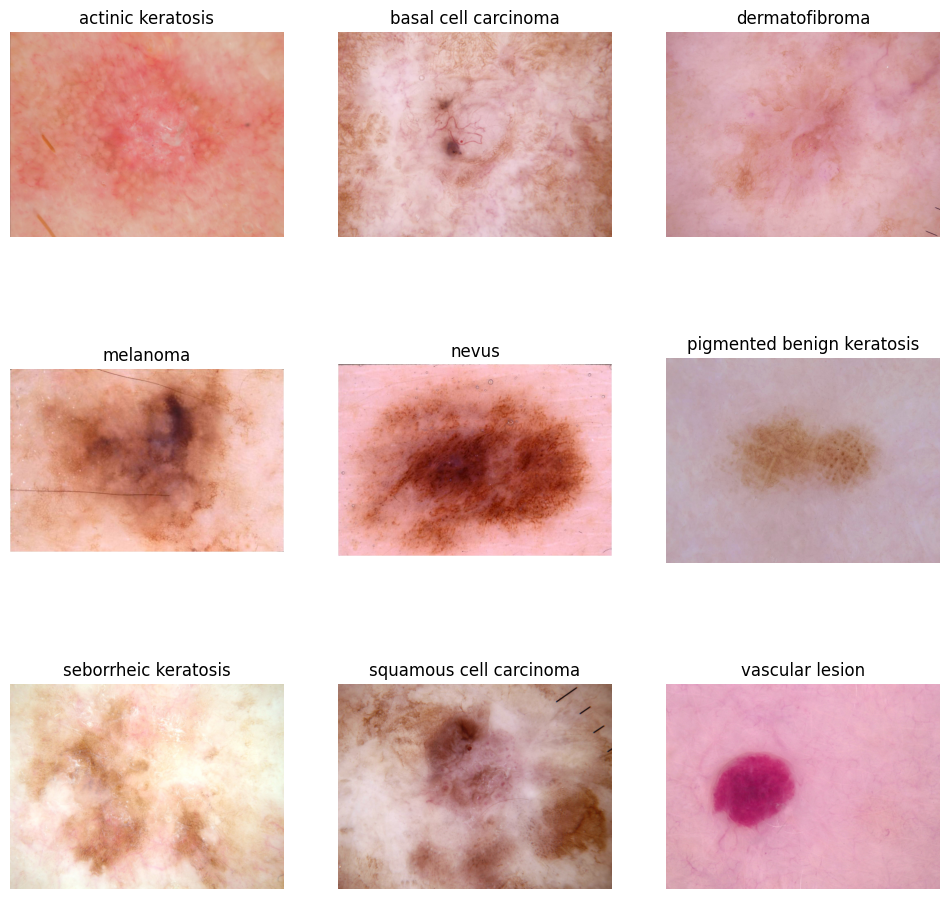

In [9]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(12,12))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[random.randint(1,100)]))
  plt.title(class_names[i])
  plt.imshow(image)
  plt.axis("off")

### Checking Data Imbalance

-  Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others.
- So treating data imbalance becomes more important when working with real life data

In [11]:
path_list=[]
lesion_list=[]
for i in class_names:
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])

- As you can see the last 5 classes or types of cancer has very low samples when compared to the top 4 classes
- seborrheic keratosis has the least number of samples
- Pigmented bengin keratosis and melanoma dominate the data in terms proportionate number of samples
- We can treat this using data augmentation

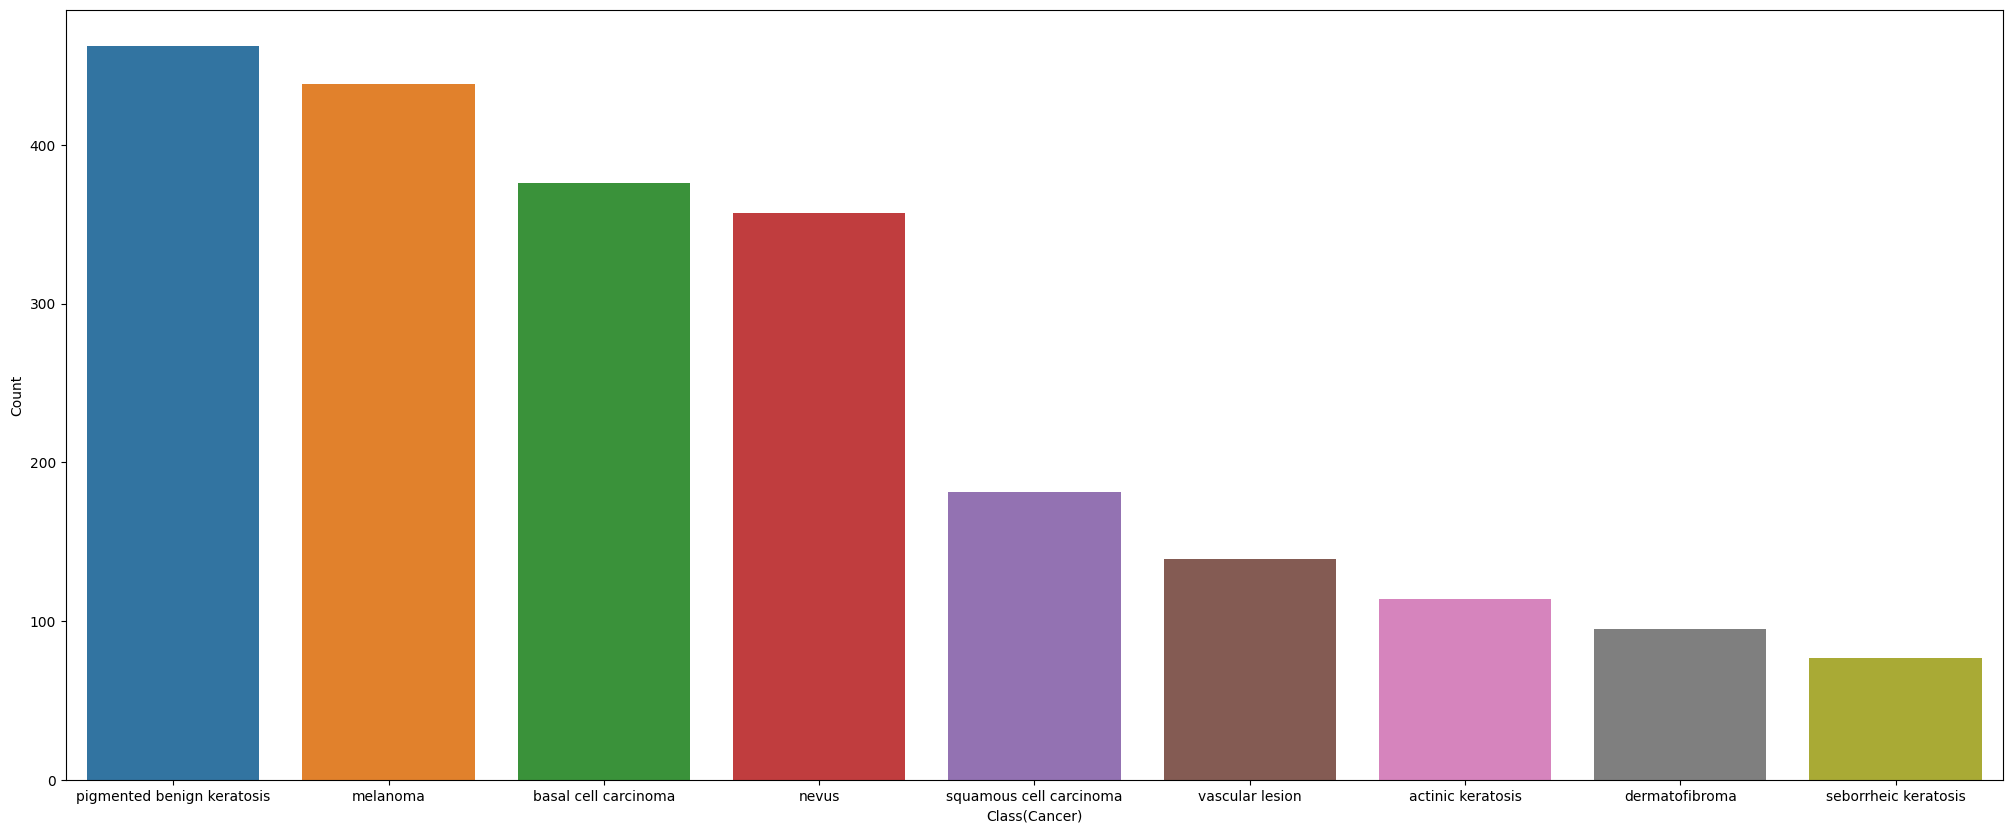

In [12]:
import seaborn as sns
k = original_df['Label'].value_counts()
df_types = pd.DataFrame({'Type' : k.index, 'Count' : k.values})
plt.figure(figsize=(25,10))
sns.barplot(data=df_types,x = 'Type',y = 'Count')
# plt.bar(df_types['Type'],df_types['Count'])
plt.xlabel("Class(Cancer)")
plt.ylabel("Count")
plt.show()

### Rectifying Data Imbalance

In [13]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [14]:
# creating a pipeline and adding more number of samples
path_to_training_dataset="/content/gdrive/MyDrive/Project Data/CNN_assignment_new/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Project Data/CNN_assignment_new/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCDBAEF7520>: 100%|██████████| 500/500 [00:29<00:00, 16.92 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Project Data/CNN_assignment_new/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCDBAD13F70>: 100%|██████████| 500/500 [00:26<00:00, 18.59 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Project Data/CNN_assignment_new/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCDBAEC3160>: 100%|██████████| 500/500 [00:24<00:00, 20.75 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Project Data/CNN_assignment_new/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2198x1603 at 0x7FCDBAD64700>: 100%|██████████| 500/500 [01:59<00:00,  4.19 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Project Data/CNN_assignment_new/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7FCDBAD7EE60>: 100%|██████████| 500/500 [01:56<00:00,  4.28 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Project Data/CNN_assignment_new/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCDBADB7DC0>: 100%|██████████| 500/500 [00:23<00:00, 21.70 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Project Data/CNN_assignment_new/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FCDBAD65810>: 100%|██████████| 500/500 [00:53<00:00,  9.27 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Project Data/CNN_assignment_new/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCDBAFCD8D0>: 100%|██████████| 500/500 [00:24<00:00, 20.09 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Project Data/CNN_assignment_new/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCDBAF025F0>: 100%|██████████| 500/500 [00:25<00:00, 19.49 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

### Splitting the Data into train and val

In [15]:
# printing the no of images after augmentation
data_dir_train_new = pathlib.Path("/content/gdrive/MyDrive/Project Data/CNN_assignment_new/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
image_count_train = len(list(data_dir_train_new.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [16]:
batch_size = 32

In [17]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_new,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [18]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_new,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [21]:
#tf.data.experimental.AUTOTUNE defines appropriate number of processes that are free for working.

#`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

#`Dataset.prefetch()` overlaps data preprocessing and model execution while training.
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model Building

#### **Todo:** Create your model (make sure to include normalization)

In [63]:
from tensorflow.keras.layers import Dense, BatchNormalization,Conv2D,MaxPool2D,Flatten,Dropout

model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation='relu'))

model.add(layers.Dropout(0.25))

model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 41, 41, 128)      

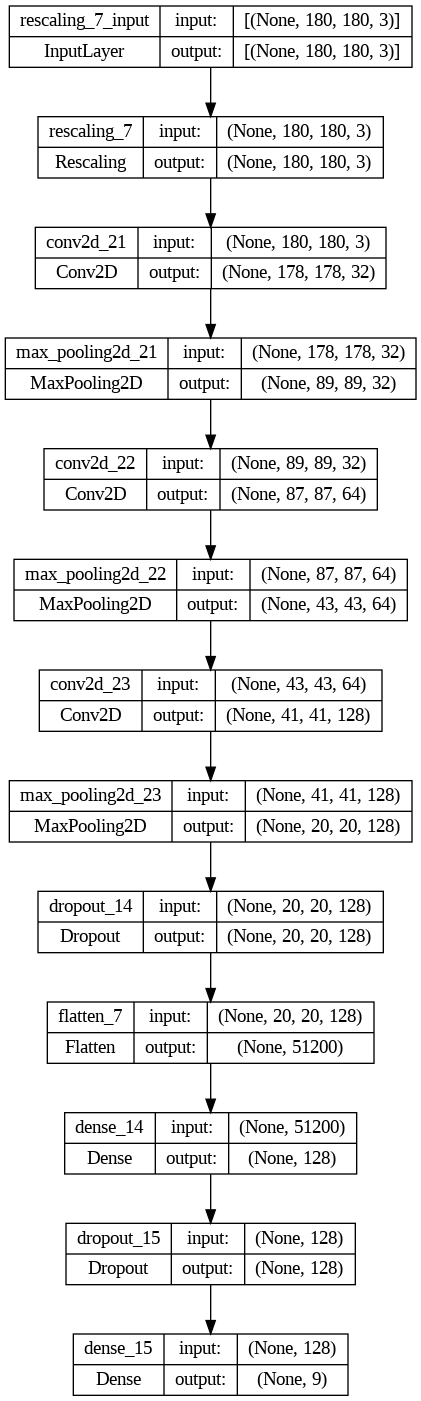

In [64]:
# vizualizing the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Model Compiling and fitting

In [65]:
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [66]:
# Training the model
epochs = 50
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/50
169/169 [==============================] - 11s 52ms/step - loss: 1.8255 - accuracy: 0.3049 - val_loss: 1.4718 - val_accuracy: 0.4380
Epoch 2/50
169/169 [==============================] - 9s 55ms/step - loss: 1.4564 - accuracy: 0.4425 - val_loss: 1.3266 - val_accuracy: 0.5152
Epoch 3/50
169/169 [==============================] - 9s 52ms/step - loss: 1.3104 - accuracy: 0.5009 - val_loss: 1.2744 - val_accuracy: 0.5293
Epoch 4/50
169/169 [==============================] - 9s 51ms/step - loss: 1.1854 - accuracy: 0.5634 - val_loss: 1.1075 - val_accuracy: 0.5991
Epoch 5/50
169/169 [==============================] - 9s 51ms/step - loss: 1.0288 - accuracy: 0.6181 - val_loss: 1.0358 - val_accuracy: 0.6362
Epoch 6/50
169/169 [==============================] - 9s 52ms/step - loss: 0.8777 - accuracy: 0.6745 - val_loss: 0.8951 - val_accuracy: 0.6875
Epoch 7/50
169/169 [==============================] - 9s 50ms/step - loss: 0.7884 - accuracy: 0.7157 - val_loss: 0.9030 - val_accuracy: 0.664

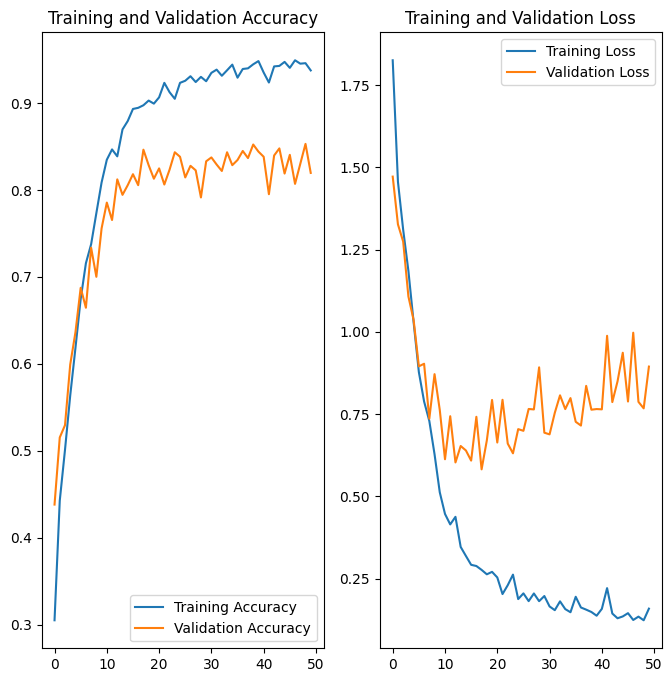

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### FINAL ANALYSIS

1/1 [==============================] - 0s 20ms/step
Actual Class: basal cell carcinoma
Predicted Class: basal cell carcinoma


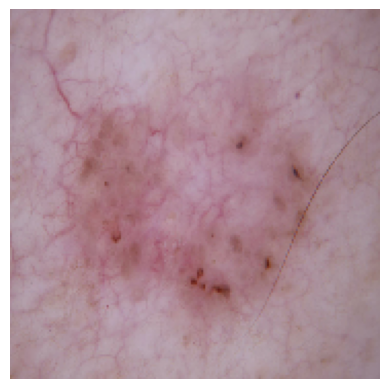

In [69]:
import random
from glob import glob
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

test_image_path = os.path.join(data_dir_test, class_names[1], '*')
test_images = glob(test_image_path)
random_image = random.choice(test_images)
Test_image = load_img(random_image, target_size=(180, 180, 3))
plt.imshow(Test_image)
plt.grid(False)
plt.axis("off")

img = np.expand_dims(Test_image, axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class: " + class_names[1])
print("Predicted Class: " + pred_class)